In [13]:
import pandas as pd

# Lire le fichier CSV
file_path = 'fournisseursV2.csv'
data = pd.read_csv(file_path, sep=';', header=None)

# Afficher les premières lignes pour comprendre la structure des données
print("Premières lignes des données :")
print(data.head())

Premières lignes des données :
                0                1          2         3          4  \
0  id_fournisseur  nom_fournisseur      ville      pays  fiabilité   
1            S001  Lecomte et Fils     Zurich    Suisse       0.84   
2            S002           Morvan      Paris    France       0.86   
3            S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4            S004         Philippe       Rome    Italie       0.57   

                   5  
0  délai_moyen_jours  
1                 10  
2                  9  
3                 10  
4                  9  


In [16]:
# Nettoyer les données
# Supprimer les lignes inutiles qui contiennent les noms des colonnes
cleaned_data = data[~data[0].str.contains('id_fournisseur', na=False)].copy()

# Renommer les colonnes avec les noms corrects
cleaned_data.columns = ['id_fournisseur', 'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours']

# Convertir les colonnes 'fiabilité' et 'délai_moyen_jours' en types numériques appropriés
cleaned_data['fiabilité'] = pd.to_numeric(cleaned_data['fiabilité'], errors='coerce')
cleaned_data['délai_moyen_jours'] = pd.to_numeric(cleaned_data['délai_moyen_jours'], errors='coerce')

# Afficher les premières lignes des données nettoyées
print("\nDonnées nettoyées :")
print(cleaned_data.head())


Données nettoyées :
  id_fournisseur  nom_fournisseur      ville      pays  fiabilité  \
1           S001  Lecomte et Fils     Zurich    Suisse       0.84   
2           S002           Morvan      Paris    France       0.86   
3           S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4           S004         Philippe       Rome    Italie       0.57   
5           S005            Blanc     Dublin   Irlande       0.65   

   délai_moyen_jours  
1                 10  
2                  9  
3                 10  
4                  9  
5                 13  


In [3]:
# Calculer des statistiques de base
print("\nStatistiques de base :")
print(cleaned_data.describe())

# Identifier les valeurs manquantes
print("\nValeurs manquantes :")
print(cleaned_data.isnull().sum())


Statistiques de base :
       fiabilité  délai_moyen_jours
count  50.000000          50.000000
mean    0.738400           8.140000
std     0.153641           3.064011
min     0.500000           3.000000
25%     0.612500           6.000000
50%     0.720000           8.500000
75%     0.877500          10.000000
max     1.000000          14.000000

Valeurs manquantes :
id_fournisseur       0
nom_fournisseur      0
ville                0
pays                 0
fiabilité            0
délai_moyen_jours    0
dtype: int64


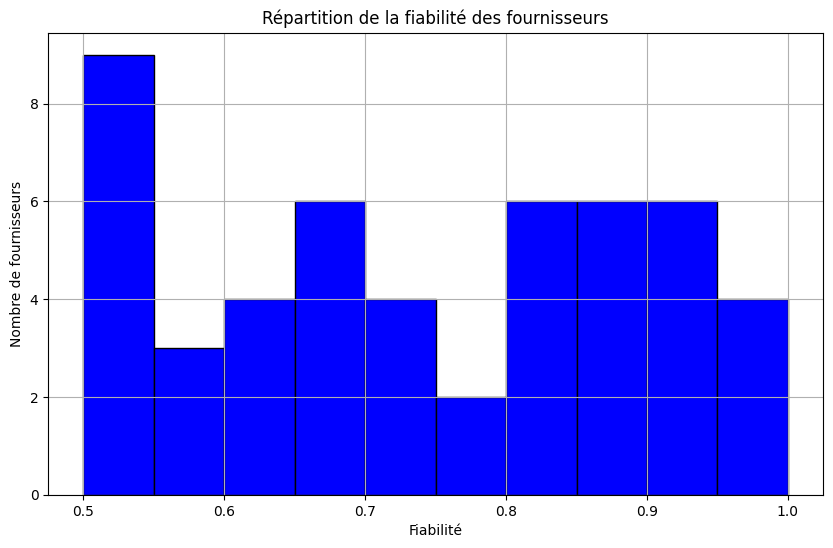

In [4]:
import matplotlib.pyplot as plt

# Visualiser la répartition de la fiabilité des fournisseurs avec un histogramme
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['fiabilité'], bins=10, color='blue', edgecolor='black')
plt.title('Répartition de la fiabilité des fournisseurs')
plt.xlabel('Fiabilité')
plt.ylabel('Nombre de fournisseurs')
plt.grid(True)
plt.show()

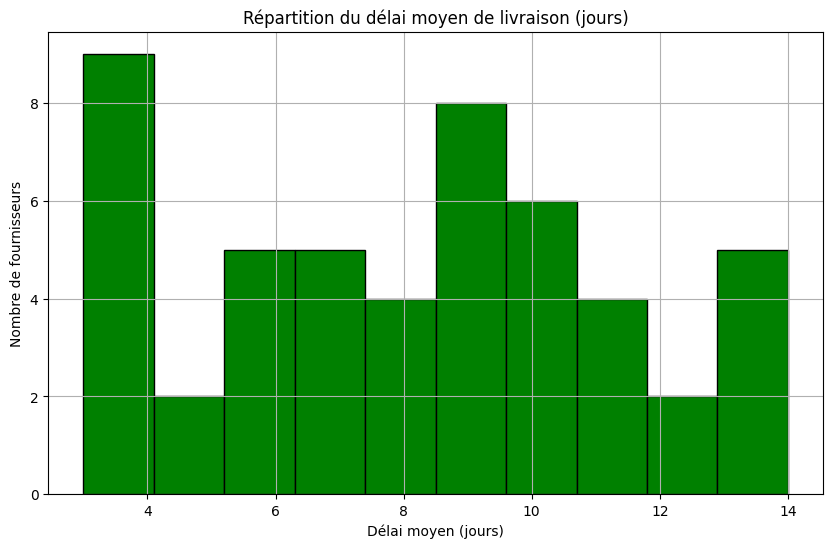

In [5]:
# Visualiser la répartition du délai moyen de livraison avec un histogramme
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['délai_moyen_jours'], bins=10, color='green', edgecolor='black')
plt.title('Répartition du délai moyen de livraison (jours)')
plt.xlabel('Délai moyen (jours)')
plt.ylabel('Nombre de fournisseurs')
plt.grid(True)
plt.show()

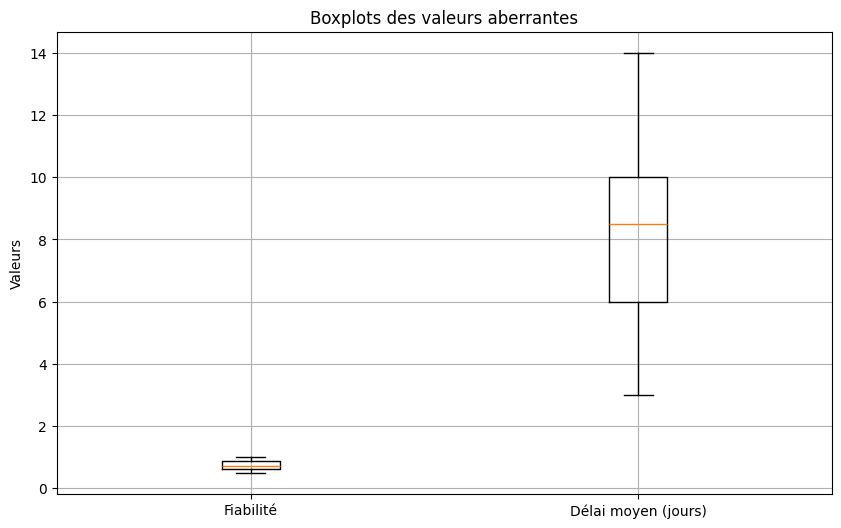

In [6]:
# Visualiser les valeurs aberrantes avec des boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([cleaned_data['fiabilité'], cleaned_data['délai_moyen_jours']], tick_labels=['Fiabilité', 'Délai moyen (jours)'])
plt.title('Boxplots des valeurs aberrantes')
plt.ylabel('Valeurs')
plt.grid(True)
plt.show()

In [7]:
# Statistiques détaillées
print("\nStatistiques détaillées :")
print(cleaned_data.describe(include='all'))


Statistiques détaillées :
       id_fournisseur  nom_fournisseur ville    pays  fiabilité  \
count              50               50    50      50  50.000000   
unique             50               50    15      15        NaN   
top              S001  Lecomte et Fils  Rome  Italie        NaN   
freq                1                1     6       6        NaN   
mean              NaN              NaN   NaN     NaN   0.738400   
std               NaN              NaN   NaN     NaN   0.153641   
min               NaN              NaN   NaN     NaN   0.500000   
25%               NaN              NaN   NaN     NaN   0.612500   
50%               NaN              NaN   NaN     NaN   0.720000   
75%               NaN              NaN   NaN     NaN   0.877500   
max               NaN              NaN   NaN     NaN   1.000000   

        délai_moyen_jours  
count           50.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean             8.140000  


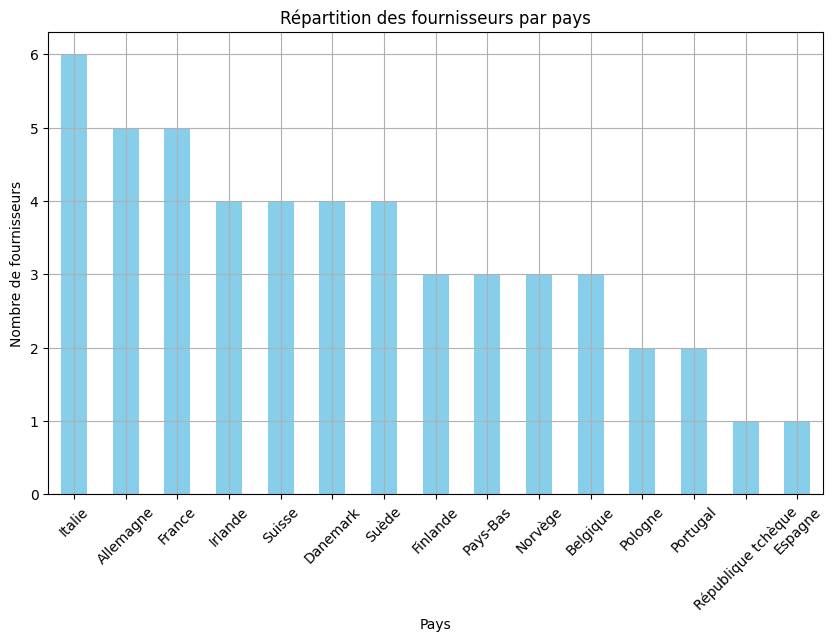

In [8]:
# Répartition des fournisseurs par pays
plt.figure(figsize=(10, 6))
cleaned_data['pays'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Répartition des fournisseurs par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de fournisseurs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

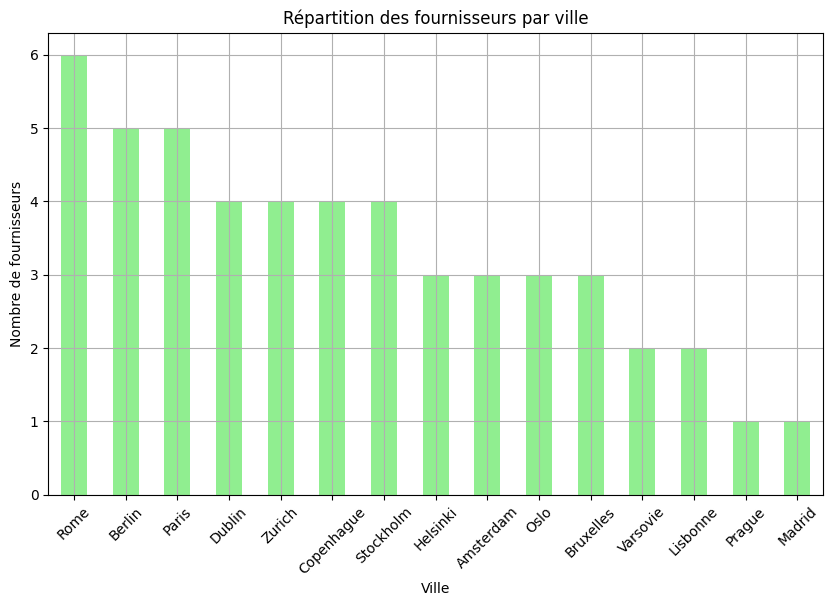

In [9]:
# Répartition des fournisseurs par ville
plt.figure(figsize=(10, 6))
cleaned_data['ville'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Répartition des fournisseurs par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre de fournisseurs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

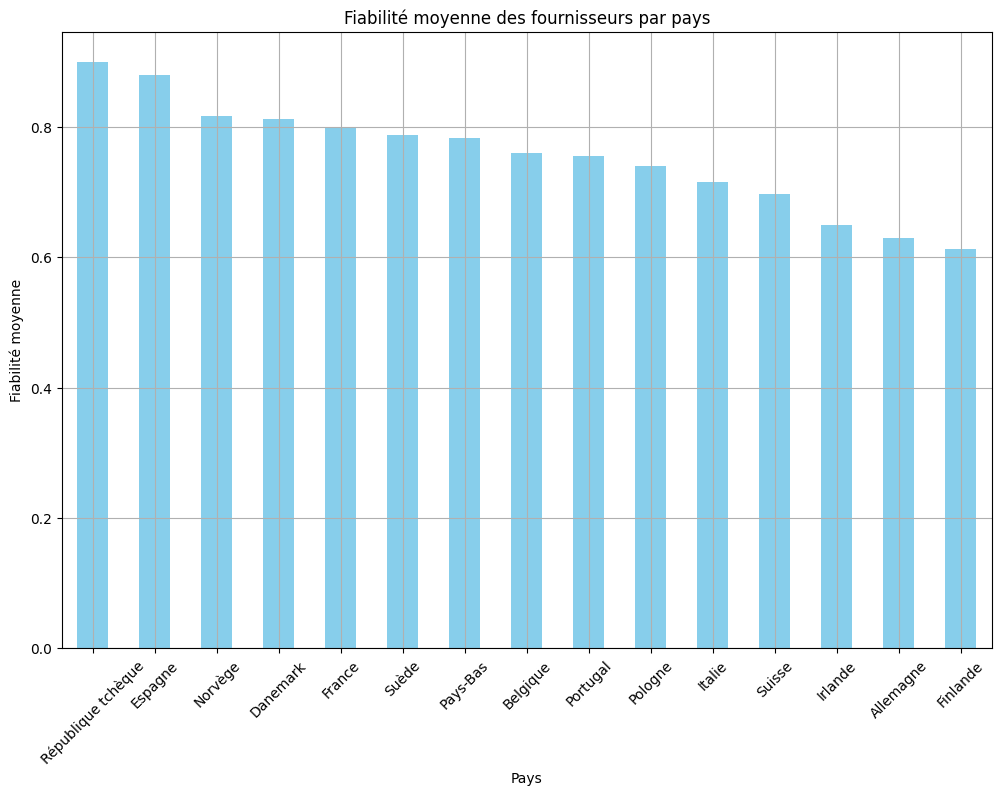

In [10]:
import matplotlib.pyplot as plt

# Calculer la moyenne de la fiabilité par pays
fiabilité_par_pays = cleaned_data.groupby('pays')['fiabilité'].mean().sort_values(ascending=False)

# Visualiser la fiabilité par pays avec un graphique en barres
plt.figure(figsize=(12, 8))
fiabilité_par_pays.plot(kind='bar', color='skyblue')
plt.title('Fiabilité moyenne des fournisseurs par pays')
plt.xlabel('Pays')
plt.ylabel('Fiabilité moyenne')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

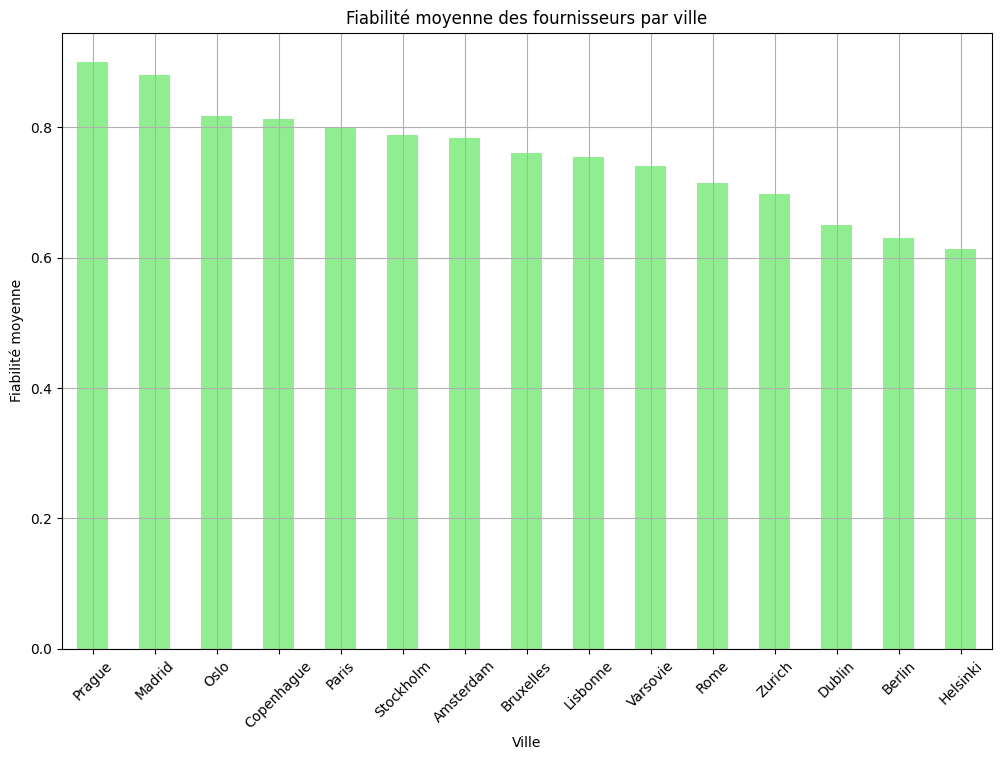

In [11]:
# Calculer la moyenne de la fiabilité par ville
fiabilité_par_ville = cleaned_data.groupby('ville')['fiabilité'].mean().sort_values(ascending=False)

# Visualiser la fiabilité par ville avec un graphique en barres
plt.figure(figsize=(12, 8))
fiabilité_par_ville.plot(kind='bar', color='lightgreen')
plt.title('Fiabilité moyenne des fournisseurs par ville')
plt.xlabel('Ville')
plt.ylabel('Fiabilité moyenne')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

# Étape 1: Lire le fichier CSV
file_path = 'fournisseursV2.csv'
data = pd.read_csv(file_path, sep=';', header=None)

# Afficher les premières lignes pour comprendre la structure des données
print("Premières lignes des données :")
print(data.head())

# Étape 2: Nettoyer les données
# Supprimer les lignes inutiles qui contiennent les noms des colonnes
cleaned_data = data[~data[0].str.contains('id_fournisseur', na=False)].copy()

# Renommer les colonnes avec les noms corrects
cleaned_data.columns = ['id_fournisseur', 'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours']

# Convertir les colonnes 'fiabilité' et 'délai_moyen_jours' en types numériques appropriés
cleaned_data['fiabilité'] = pd.to_numeric(cleaned_data['fiabilité'], errors='coerce')
cleaned_data['délai_moyen_jours'] = pd.to_numeric(cleaned_data['délai_moyen_jours'], errors='coerce')

# Afficher les premières lignes des données nettoyées
print("\nDonnées nettoyées :")
print(cleaned_data.head())

# Étape 3: Enregistrer les données nettoyées dans un nouveau fichier CSV
cleaned_data.to_csv('fournisseurs_cleaned.csv', index=False)

print("\nDonnées nettoyées enregistrées dans 'fournisseurs_nettoyees.csv'")

Premières lignes des données :
                0                1          2         3          4  \
0  id_fournisseur  nom_fournisseur      ville      pays  fiabilité   
1            S001  Lecomte et Fils     Zurich    Suisse       0.84   
2            S002           Morvan      Paris    France       0.86   
3            S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4            S004         Philippe       Rome    Italie       0.57   

                   5  
0  délai_moyen_jours  
1                 10  
2                  9  
3                 10  
4                  9  

Données nettoyées :
  id_fournisseur  nom_fournisseur      ville      pays  fiabilité  \
1           S001  Lecomte et Fils     Zurich    Suisse       0.84   
2           S002           Morvan      Paris    France       0.86   
3           S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4           S004         Philippe       Rome    Italie       0.57   
5           S005            Blanc     Dublin